<a href="https://colab.research.google.com/github/hunn99/ML_Ganjil_2024/blob/main/Kuis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Denny Malik Ibrahim
## TI-3B / 08
## KUIS 1 - MACHINE LEARNING

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

# Preparation

In [1]:
# Load required library
# Import Required Library
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Load Data

In [2]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


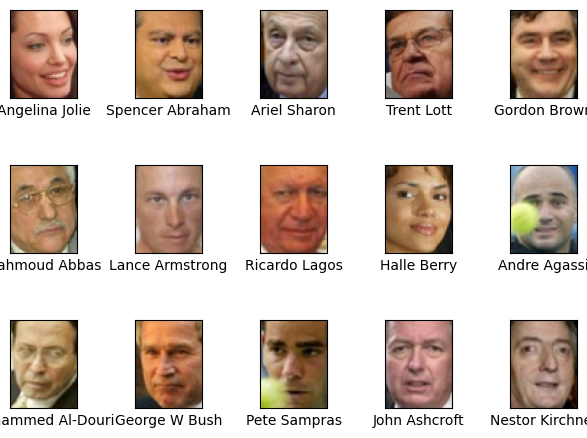

In [3]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,
    
    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

In [4]:
#3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
# Normalisasi pixel nilai ke [0, 1]
faces_data = faces.images / 255.0

# flatten data citra menjadi vektor
n_samples, h, w, c = faces.images.shape
faces_data_flat = faces_data.reshape(n_samples, h*w*c)

# Features Extraction

'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

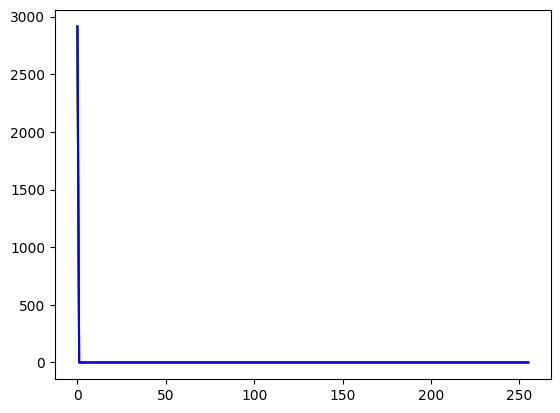

In [5]:

# Fungsi untuk menghitung histogram

# Menghitung histogram untuk setiap channel pada citra RGB
def plot_histogram(image):
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = np.histogram(image[:, :, i], bins=256, range=(0, 256))[0]
        plt.plot(hist, color=color)
    plt.show()

# Plot histogram untuk satu gambar
plot_histogram(faces_data[0])

# Build Model

'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

In [6]:
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(faces_data_flat, faces.target, test_size=0.3, random_state=42)

# Membuat model SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Inisialisasi dan latih model SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Definisikan parameter grid
# Karena hasil predict yang rendah saya cari cara lain agar accuracy meningkat
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  42.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  40.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  40.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  40.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  40.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 1.1min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 1.1min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 1.1min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 1.1min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 1.1min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  40.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  40.3s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

# Evaluation

'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

In [1]:
# Gunakan model terbaik
svm_model = grid_search.best_estimator_

# Prediksi dan evaluasi lagi
y_pred = svm_model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Buat classification report dengan zero_division=1
report = classification_report(y_test, y_pred, target_names=faces.target_names, zero_division=1)
print("\nClassification Report:")
print(report)

# Visualisasikan confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'grid_search' is not defined